## Decision Tree Plotting

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"

In [6]:
dataset=pd.read_csv(url,header=None)

In [7]:
dataset

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [14]:
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [15]:
df=dataset

In [18]:
target=df[0]
data=df.drop(columns=[0])
print(data)
print(target)

     1  2  3  4
0    1  1  1  1
1    1  1  1  2
2    1  1  1  3
3    1  1  1  4
4    1  1  1  5
..  .. .. .. ..
620  5  5  5  1
621  5  5  5  2
622  5  5  5  3
623  5  5  5  4
624  5  5  5  5

[625 rows x 4 columns]
0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: 0, Length: 625, dtype: object


In [27]:
X = df.values[:, 1:5]
Y = df.values[:,0]

- L [balance scale tip to the left]
- B [balance scale be balanced]
- R [balance scale tip to the right]

In [20]:
df[0].nunique()

3

In [21]:
df[0].value_counts()

L    288
R    288
B     49
Name: 0, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [31]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=100)

- Using gini

In [25]:
dt_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)

In [32]:
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [52]:
print(accuracy_score(dt_gini.predict(x_train),y_train)*100)

77.34553775743707


- using entropy

In [62]:
dt_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5,ccp_alpha=0.000001)

In [63]:
dt_en.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=1e-06, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
print(accuracy_score(dt_en.predict(x_train),y_train)*100)

77.11670480549199


In [44]:
dt_en.fit(x_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [50]:
print(accuracy_score(dt_en.predict(x_test),y_test)*100)

80.85106382978722


In [46]:
dt_en.predict(x_test)

array(['L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L',
       'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'R',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R',
       'R', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L',
       'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R',
       'L', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L

In [48]:
print(confusion_matrix(dt_en.predict(x_train),y_train))

[[  0   0   0]
 [ 23 161  43]
 [ 13  42 155]]


In [49]:
print(classification_report(dt_en.predict(x_train),y_train))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00         0
           L       0.79      0.71      0.75       227
           R       0.78      0.74      0.76       210

    accuracy                           0.72       437
   macro avg       0.53      0.48      0.50       437
weighted avg       0.79      0.72      0.75       437



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


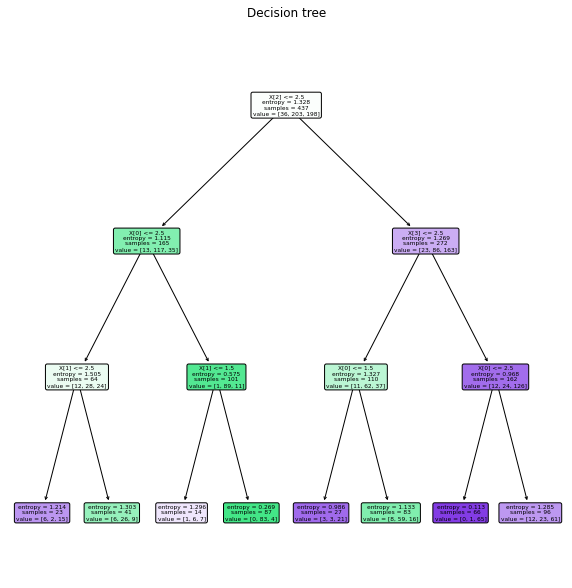

In [76]:
plt.figure(figsize=(10,10))
from sklearn import tree
tree.plot_tree(dt_en,filled=True,rounded=True)
plt.title("Decision tree",pad=20)
plt.show()

In [74]:
import graphviz

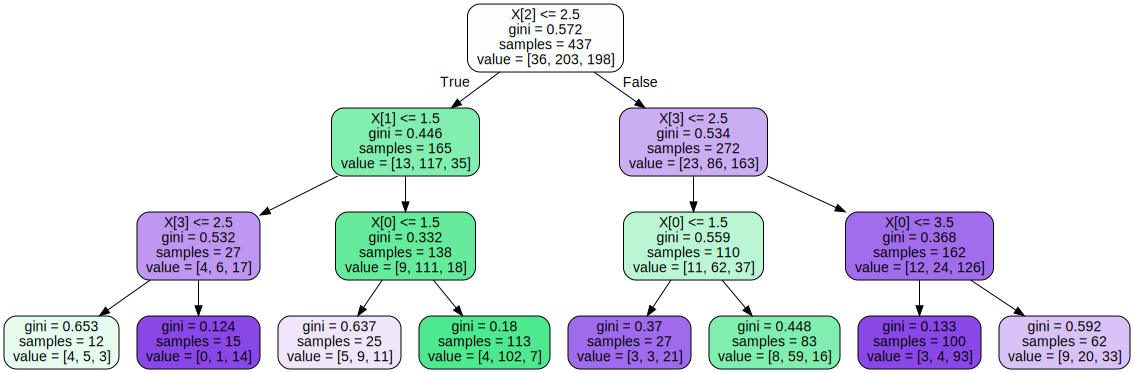

In [78]:
dot_data=tree.export_graphviz(dt_gini,max_depth=4,rounded=True,filled=True)
graph=graphviz.Source(dot_data)
graph